# A "Thin" Application of Time Series

Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", in a DataFrame called **diet**. 

A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

The index of dates are strings and should be converted to a datetime index before plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
diet = pd.read_csv('data/diet.csv', index_col=['Date'])

diet.head()

diet
Date           
6/26/2011    70
7/3/2011     71
7/10/2011    73
7/17/2011    74
7/24/2011    72

In [7]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

diet.head()

diet
Date            
2011-06-26    70
2011-07-03    71
2011-07-10    73
2011-07-17    74
2011-07-24    72

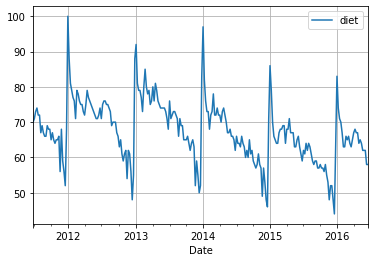

In [8]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

In [9]:
# Slice the diet dataset to keep only values from 2012, assigning to diet2012.
diet2012 = diet['2012']

diet2012.head()

diet
Date            
2012-01-01   100
2012-01-08    88
2012-01-15    81
2012-01-22    79
2012-01-29    77

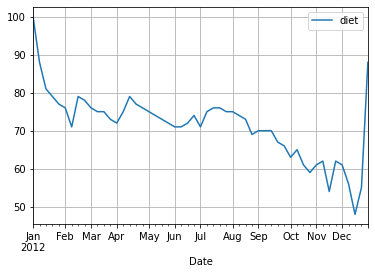

In [10]:
# Plot 2012 data
diet2012.plot(grid=True);

**NOTE:** Note how searches for `diet` spiked after the holidays every year. May be due to New Year Resolution people search "diet" every year, but could not cope up with the resolution throughout the year.

## Merging Time Series With Different Dates

**Stock** and **bond** markets in the U.S. are closed on different days. 

`For example`, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from <a href="https://fred.stlouisfed.org/">FRED</a>.

In [12]:
# read in stock and bond csv
stocks = pd.read_csv('data/stocks.csv', index_col='observation_date')
bonds = pd.read_csv('data/bonds.csv', index_col='observation_date')

print(stocks.head())
print(bonds.head())

                    SP500
observation_date         
2007-06-11        1509.12
2007-06-12        1493.00
2007-06-13        1515.67
2007-06-14        1522.97
2007-06-15        1532.91
                  US10Y
observation_date       
2007-06-08         5.12
2007-06-11         5.14
2007-06-12         5.26
2007-06-13         5.20
2007-06-14         5.23


In [ ]:
# Convert to datetime
stocks.index = pd.to_datetime(stocks.index)
bonds.index = pd.to_datetime(bonds.index)

In [18]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

In [19]:
# Take the difference between the sets and print
set_stock_dates - set_bond_dates

{'2007-10-08',
 '2007-11-12',
 '2008-10-13',
 '2008-11-11',
 '2009-10-12',
 '2009-11-11',
 '2010-10-11',
 '2010-11-11',
 '2011-10-10',
 '2011-11-11',
 '2012-10-08',
 '2012-11-12',
 '2013-10-14',
 '2013-11-11',
 '2014-10-13',
 '2014-11-11',
 '2015-10-12',
 '2015-11-11',
 '2016-10-10',
 '2016-11-11',
 '2017-06-09'}

In [20]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how="inner")

In [21]:
stocks_and_bonds.head()

SP500  US10Y
observation_date                
2007-06-11        1509.12   5.14
2007-06-12        1493.00   5.26
2007-06-13        1515.67   5.20
2007-06-14        1522.97   5.23
2007-06-15        1532.91   5.16